# EDA Hands-On Lab — Ames Housing Dataset *(Student Notebook)*

**Master's in Data Science — LUISS Guido Carli**

| | |
|---|---|
| **Format** | Hands-on practical lab (~90 min) |
| **Dataset** | Ames Housing — 1,460 houses, 81 features, target: SalePrice |
| **Slides** | EDA_Lecture.pptx — use as reference throughout |
| **Goal** | Execute a complete, systematic EDA workflow from raw data to modeling-ready features |

### How this notebook works
- **Pre-filled cells** → run them as-is (setup, helpers, visualizations)
- **TASK cells** → you write the code! Follow the instructions and slide references
- ** Hints** → nudge you in the right direction
- Tasks are numbered sequentially. Try before looking at the solution notebook!

| Step | What | Time | Slides |
|------|------|------|--------|
| 0 | Setup & Load | 3 min | 2 |
| 1 | First Contact — shape, types, sanity | 7 min | 4-6 |
| 2 | Data Types — numerical vs categorical | 7 min | 8-9 |
| 3 | Summary Statistics — center, spread, shape | 10 min | 11-16 |
| 4 | Univariate Analysis — distributions one at a time | 12 min | 18-22 |
| 5 | Bivariate Analysis — relationships between pairs | 15 min | 24-29 |
| 6 | Multivariate — PCA, pair plots | 8 min | 31-33 |
| 7 | Missing Data — patterns & imputation | 10 min | 36-38 |
| 8 | Outliers — detection & strategy | 8 min | 40-42 |
| 9 | Transformations — log, scaling, encoding | 8 min | 44-46 |
| 10 | Wrap-up — checklist & Anscombe | 2 min | 48-53 |

---
## Step 0 — Setup & Data Loading `[Slide 2]` 3 min

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings

warnings.filterwarnings('ignore')
sns.set_theme(style='whitegrid', font_scale=1.05, palette='muted')
plt.rcParams['figure.dpi'] = 120
plt.rcParams['figure.figsize'] = (10, 5)
pd.set_option('display.max_columns', 40)
pd.set_option('display.float_format', '{:.2f}'.format)

# Color palette
NAVY, STEEL, CORAL, GREEN = '#1A3764', '#4682B4', '#E8735A', '#27AE60'

print(' Setup complete')

 Setup complete


In [2]:
# Load Ames Housing dataset
from sklearn.datasets import fetch_openml
ames = fetch_openml(name='house_prices', as_frame=True, parser='auto')
df = ames.frame.copy()
print(f'Loaded: {df.shape[0]:,} rows × {df.shape[1]} columns')
df.head(3)

Loaded: 1,460 rows × 81 columns


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,...,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.00,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,...,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.00,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,...,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.00,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,...,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


---
## Step 1 — First Contact with the Data `[Slides 4-6]` 7 min

> *"Let the data speak — don't impose assumptions prematurely."* — Tukey

Before any analysis: **understand what you have**. Shape, types, basic sanity checks.

In [3]:
# TASK 1 
# Print the shape, memory usage, and first 20 column names of df
# Hint: Use df.shape, df.memory_usage(deep=True).sum(), df.columns[:20]
#
# YOUR CODE HERE
print(df.shape,"\n" ,df.memory_usage(deep=True).sum(),'\n', df.columns[:20] )




(1460, 81) 
 3619902 
 Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt'],
      dtype='str')


In [4]:
# TASK 2 
# Check for duplicate rows and verify the Id column is unique
# Hint: df.duplicated().sum() and df['Id'].nunique()
#
# YOUR CODE HERE
print("Number of duplicated rows:",df.duplicated().sum(), '\n',"Number of unique item in the 'Id' column:", df['Id'].nunique())


Number of duplicated rows: 0 
 Number of unique item in the 'Id' column: 1460


In [5]:
# TASK 3 
# Print min, max, mean, median, and missing count for SalePrice
# Hint: Use df['SalePrice'].min(), .max(), .mean(), .median(), .isnull().sum()
#
# YOUR CODE HERE
df["SalePrice"].describe()

count     1460.00
mean    180921.20
std      79442.50
min      34900.00
25%     129975.00
50%     163000.00
75%     214000.00
max     755000.00
Name: SalePrice, dtype: float64

**Takeaway:** Mean > Median → right-skewed distribution (expensive homes pull the mean up). See `[Slide 11]` for why this matters.

---
## Step 2 — Data Types `[Slides 8-9]` 7 min

Choosing the right visualization and statistical test **depends entirely on data type**.

| | Continuous | Discrete | Nominal | Ordinal |
|---|---|---|---|---|
| Example | SalePrice | Bedrooms | BldgType | OverallQual |
| Plot | Histogram | Bar | Count plot | Ordered bar |
| Correlation | Pearson/Spearman | Spearman | Chi² | Spearman |

In [6]:
# TASK 4 
# Count dtypes, separate numerical vs categorical columns, remove 'Id' from num_cols
# Hint: df.dtypes.value_counts(), df.select_dtypes(include=[np.number]).columns
#
# YOUR CODE HERE


In [7]:
# TASK 5 
# Create 3 side-by-side plots: histogram for GrLivArea, bar for FullBath, barh for MSZoning
# Hint: plt.subplots(1,3), .hist(), .value_counts().plot.bar(), .value_counts().plot.barh()
#
# YOUR CODE HERE


 **Pandas dtype ≠ statistical type!** A zip code stored as `int64` is categorical. Always verify with domain knowledge. See `[Slide 9]`.

---
## Step 3 — Summary Statistics `[Slides 11-16]` 10 min

Three pillars: **center** (mean, median, mode), **spread** (std, IQR, CV), **shape** (skewness, kurtosis).

In [8]:
# TASK 6 
# Compute mean, median, mode of SalePrice. Plot histogram with mean/median lines + box plot. [Slide 11]
# Hint: price.mean(), .median(), .mode()[0]. Use ax.axvline() for vertical lines. ax.boxplot() for box plot
#
# YOUR CODE HERE


In [9]:
# TASK 7 
# Compute Mean, Std, IQR, Range, and CV% for 5 features. Which has highest relative variability?
# Hint: IQR = .quantile(0.75) - .quantile(0.25), CV = std/mean * 100
#
# YOUR CODE HERE


In [10]:
# TASK 8 
# Compute skewness and kurtosis for all numerical features. How many have |skew| > 1?
# Hint: df[num_cols].skew(), .kurtosis(). Flag with .abs() > 1
#
# YOUR CODE HERE


In [11]:
# TASK 9 
# Run df.describe() on the first 10 numerical columns. Transpose the result for readability.
# Hint: df[num_cols[:10]].describe().T
#
# YOUR CODE HERE


---
## Step 4 — Univariate Analysis `[Slides 18-22]` 12 min

Examine **one variable at a time**. Four views for numerical, two for categorical.

### 4.1 Numerical: Four Views of SalePrice `[Slide 18]`

In [12]:
# TASK 10 
# Create a 2×2 grid showing SalePrice as: histogram, KDE, box plot, violin plot [Slide 18]
# Hint: plt.subplots(2,2). Use .hist(), .plot.kde(), ax.boxplot(vert=False), ax.violinplot(vert=False)
#
# YOUR CODE HERE


### 4.2 Bin Size Effect `[Slide 19]`

In [13]:
# TASK 11 
# Plot SalePrice histograms with 5, 20, 50, and 200 bins side by side. Which reveals the most structure?
# Hint: plt.subplots(1,4), loop over [5, 20, 50, 200]
#
# YOUR CODE HERE


### 4.3 QQ-Plot: Testing Normality `[Slide 21]`

In [14]:
# TASK 12 
# Create QQ-plots for SalePrice (original) and log(SalePrice). Run Shapiro-Wilk on both.
# Hint: stats.probplot(data, plot=ax). stats.shapiro(sample). Use np.log1p() for log(x+1)
#
# YOUR CODE HERE


### 4.4 Categorical Features `[Slide 22]`

In [15]:
# TASK 13 
# Plot: top 10 neighborhoods (barh), OverallQual distribution (bar), cardinality of all categoricals
# Hint: value_counts().head(10).plot.barh(), nunique().sort_values()
#
# YOUR CODE HERE


---
## Step 5 — Bivariate Analysis `[Slides 24-29]` 15 min

Relationships between **pairs** of variables. This is where modeling insights emerge.

### 5.1 Numerical × Numerical: Scatter + Pearson `[Slide 24]`

In [16]:
# TASK 14 
# Compute correlation of all numerical features with SalePrice. Show top 8 positive and top 3 negative.
# Hint: df[num_cols].corrwith(df['SalePrice']).sort_values(ascending=False)
#
# YOUR CODE HERE
num_cols = df.select_dtypes(include=["number"]).columns

corr_target = df[num_cols].corrwith(df['SalePrice']).drop('SalePrice', errors='ignore')
top_pos = corr_target.sort_values(ascending=False).head(8)
top_neg = corr_target.sort_values().head(3)

print('Strongest POSITIVE correlations with SalePrice:')
for feat, r in top_pos.items():
 bar = '' * int(abs(r) * 30)
 print(f' {feat:20s} r = {r:+.3f} {bar}')

print(f'\nStrongest NEGATIVE:')
for feat, r in top_neg.items():
    print(f' {feat:20s} r = {r:+.3f}')


Strongest POSITIVE correlations with SalePrice:
 OverallQual          r = +0.791 
 GrLivArea            r = +0.709 
 GarageCars           r = +0.640 
 GarageArea           r = +0.623 
 TotalBsmtSF          r = +0.614 
 1stFlrSF             r = +0.606 
 FullBath             r = +0.561 
 TotRmsAbvGrd         r = +0.534 

Strongest NEGATIVE:
 KitchenAbvGr         r = -0.136
 EnclosedPorch        r = -0.129
 MSSubClass           r = -0.084


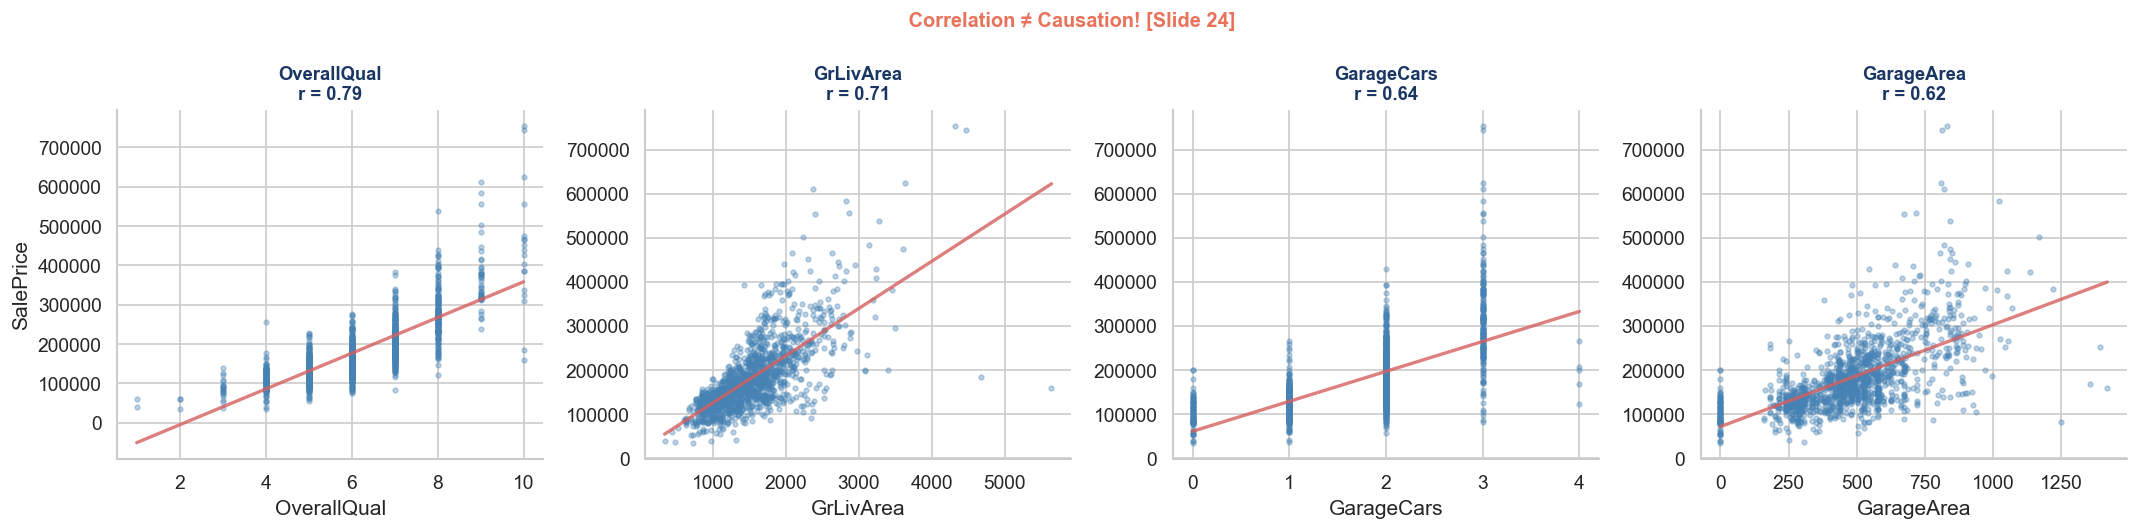

In [17]:
# TASK 15 
# Scatter plots with regression line for top 4 predictors of SalePrice
# Hint: np.polyfit() for regression, np.polyval() to evaluate. ax.scatter() + ax.plot()
#
# YOUR CODE HERE
top4 = top_pos.head(4).index.tolist()

fig, axes = plt.subplots(1, 4, figsize=(18, 4.5))
for ax, feat in zip(axes, top4):
 ax.scatter(df[feat], df['SalePrice'], s=8, alpha=0.35, color=STEEL)
 # Regression line
 mask = df[feat].notna()
 z = np.polyfit(df.loc[mask, feat], df.loc[mask, 'SalePrice'], 1)
 xl = np.linspace(df[feat].min(), df[feat].max(), 100)
 ax.plot(xl, np.polyval(z, xl), 'r-', lw=2, alpha=0.8)
 r = df[feat].corr(df['SalePrice'])
 ax.set_title(f'{feat}\nr = {r:.2f}', fontweight='bold', color=NAVY, fontsize=11)
 ax.set_xlabel(feat); ax.set_ylabel('SalePrice' if ax == axes[0] else '')
 ax.spines['top'].set_visible(False); ax.spines['right'].set_visible(False)
plt.suptitle(' Correlation ≠ Causation! [Slide 24]', color=CORAL, fontweight='bold', fontsize=12)
plt.tight_layout()
plt.show()


### 5.2 Correlation Heatmap + Spearman `[Slides 25-26]`

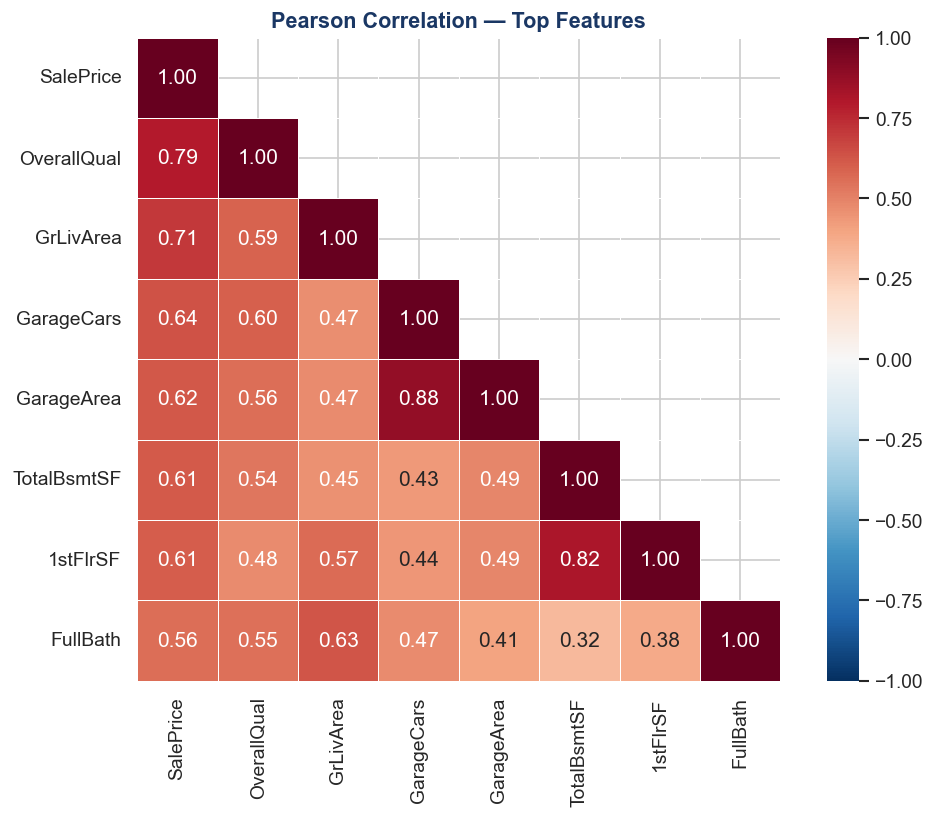

In [18]:
# TASK 16 
# Create correlation heatmap (lower triangle) for top 8 features. Detect multicollinearity (r > 0.8).
# Hint: np.triu() for mask, sns.heatmap(mask=mask, annot=True). Loop over pairs to find |r| > 0.8
#
# YOUR CODE HERE
top8 = ['SalePrice'] + top_pos.head(7).index.tolist()
corr_matrix = df[top8].corr()

fig, ax = plt.subplots(figsize=(9, 7))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool), k=1)
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt='.2f', cmap='RdBu_r', center=0,
 vmin=-1, vmax=1, square=True, linewidths=0.5, ax=ax)
ax.set_title('Pearson Correlation — Top Features', fontweight='bold', color=NAVY, fontsize=13)
plt.tight_layout()
plt.show()


In [19]:
print(' Multicollinearity (r > 0.8 between features):')
for i in range(1, len(top8)):
 for j in range(i+1, len(top8)):
  r = corr_matrix.iloc[i, j]
  if abs(r) > 0.8:
   print(f'{top8[i]} {top8[j]}: r = {r:.2f}') # → consider dropping one
   

 Multicollinearity (r > 0.8 between features):
GarageCars GarageArea: r = 0.88
TotalBsmtSF 1stFlrSF: r = 0.82


In [20]:
# TASK 17 
# Compare Pearson vs Spearman for each top feature. Which features show non-linear relationships?
# Hint: df[feat].corr(df['SalePrice'], method='pearson') vs method='spearman'
#
# YOUR CODE HERE      
print(f'{"Feature":>20s} {"Pearson":>8s} {"Spearman":>9s} {"Δ":>5s}')
print('' * 50)
for feat in top8[1:]:
 r_p = df[feat].corr(df['SalePrice'], method='pearson')
 r_s = df[feat].corr(df['SalePrice'], method='spearman')
 d = abs(r_p - r_s)
 flag = ' ← non-linear!' if d > 0.05 else ''
 print(f'{feat:>20s} {r_p:>+8.3f} {r_s:>+9.3f} {d:>5.3f}{flag}')

print('\n→ When Pearson ≠ Spearman → relationship is non-linear [Slide 26]')


             Feature  Pearson  Spearman     Δ

         OverallQual   +0.791    +0.810 0.019
           GrLivArea   +0.709    +0.731 0.023
          GarageCars   +0.640    +0.691 0.050 ← non-linear!
          GarageArea   +0.623    +0.649 0.026
         TotalBsmtSF   +0.614    +0.603 0.011
            1stFlrSF   +0.606    +0.575 0.030
            FullBath   +0.561    +0.636 0.075 ← non-linear!

→ When Pearson ≠ Spearman → relationship is non-linear [Slide 26]


### 5.3 Categorical × Numerical: ANOVA `[Slides 27-28]`

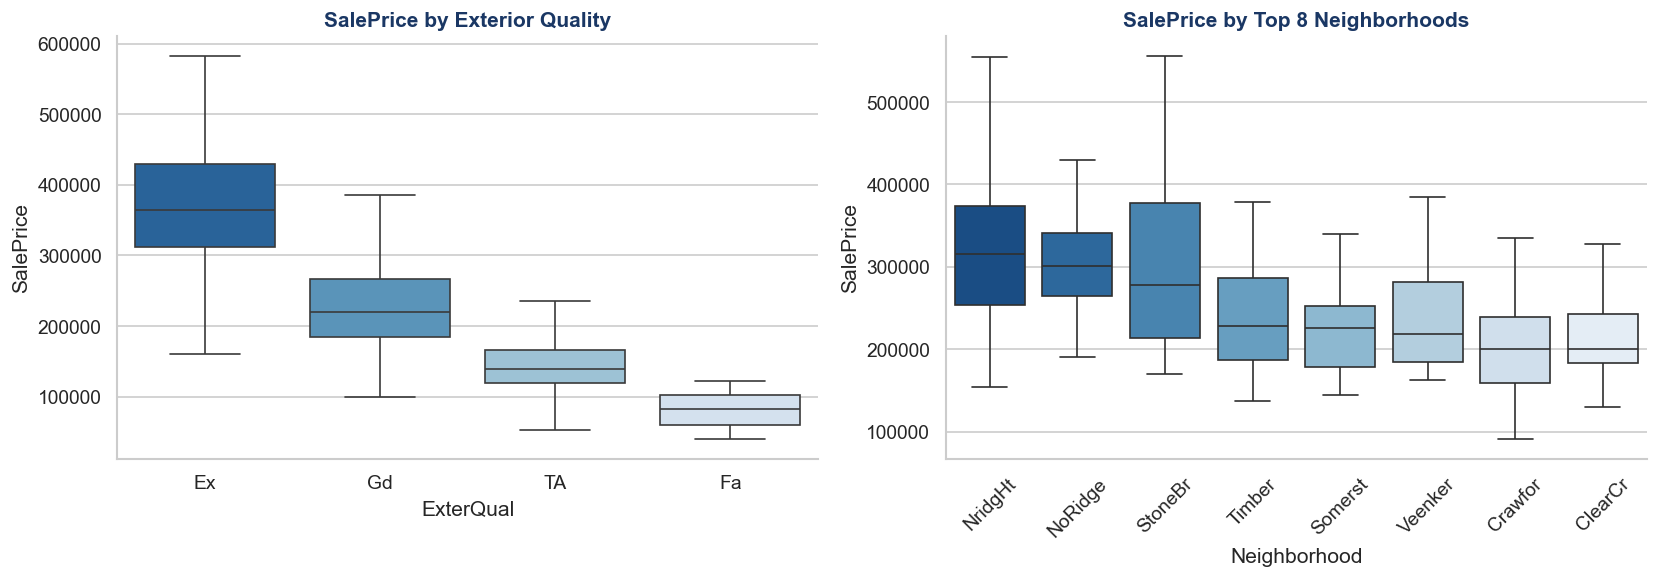

One-Way ANOVA (SalePrice ~ ExterQual): F = 443.3, p = 1.44e-204
→  Significant difference between quality groups


In [21]:
# TASK 18 
# Box plots: SalePrice by ExterQual (ordered) and by top 8 Neighborhoods. Run ANOVA on ExterQual groups.
# Hint: sns.boxplot(order=...). stats.f_oneway(*groups) for ANOVA. [Slides 27-28]
#
# YOUR CODE HERE
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# ExterQual — ordinal
order_eq = [v for v in ['Ex', 'Gd', 'TA', 'Fa', 'Po'] if v in df['ExterQual'].unique()]
sns.boxplot(data=df, x='ExterQual', y='SalePrice', order=order_eq, ax=axes[0],
 palette='Blues_r', showfliers=False)
axes[0].set_title('SalePrice by Exterior Quality', fontweight='bold', color=NAVY)

# Neighborhood — top 8 by median price
top_neigh = df.groupby('Neighborhood')['SalePrice'].median().nlargest(8).index
sns.boxplot(data=df[df['Neighborhood'].isin(top_neigh)], x='Neighborhood', y='SalePrice',
 order=top_neigh, ax=axes[1], palette='Blues_r', showfliers=False)
axes[1].tick_params(axis='x', rotation=45)
axes[1].set_title('SalePrice by Top 8 Neighborhoods', fontweight='bold', color=NAVY)

for ax in axes: ax.spines['top'].set_visible(False); ax.spines['right'].set_visible(False)
plt.tight_layout(); plt.show()

# ANOVA
groups = [g['SalePrice'].dropna() for _, g in df.groupby('ExterQual')]
f_stat, p_val = stats.f_oneway(*groups)
print(f'One-Way ANOVA (SalePrice ~ ExterQual): F = {f_stat:.1f}, p = {p_val:.2e}')
print(f'→ {" Significant" if p_val < 0.05 else " Not significant"} difference between quality groups')


### 5.4 Categorical × Categorical: Chi² `[Slide 29]`

Contingency Table (MSZoning × BldgType):
BldgType   1Fam  2fmCon  Duplex  Twnhs  TwnhsE
MSZoning                                      
'C (all)'     9       1       0      0       0
FV           38       0       0      9      18
RH            9       2       3      0       2
RL         1025      16      43     10      57
RM          139      12       6     24      37

χ² = 223.0, dof = 16, p = 1.75e-38
→  NOT independent (p < 0.05)


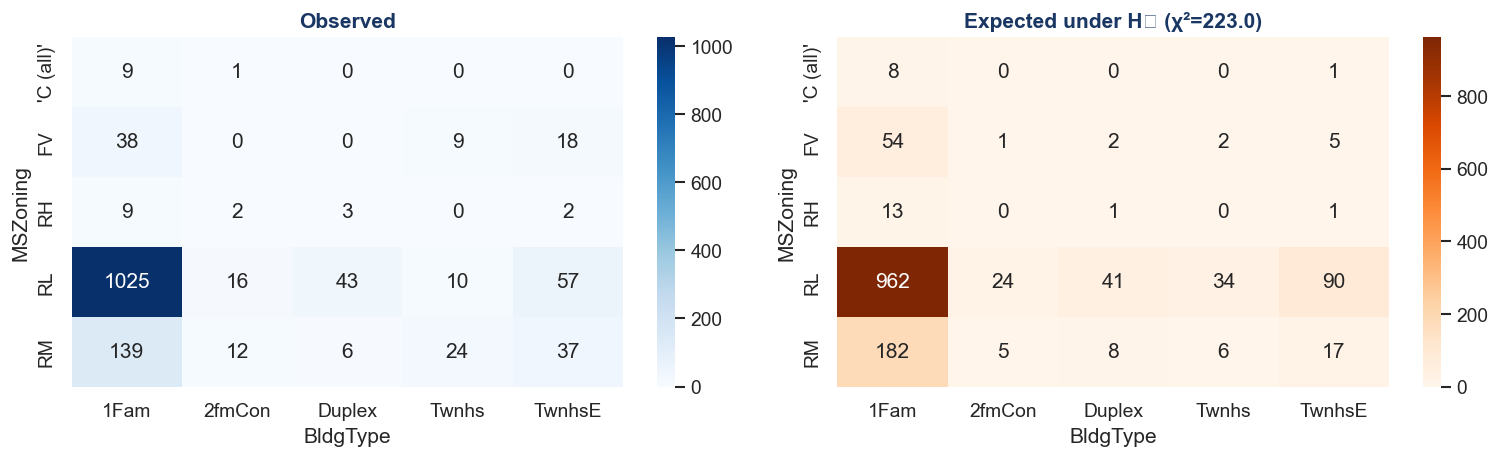

In [22]:
# TASK 19 
# Create contingency table for MSZoning × BldgType. Run chi-squared test. Heatmap observed vs expected.
# Hint: pd.crosstab(). stats.chi2_contingency(ct) returns chi2, p, dof, expected. [Slide 29]
#
# YOUR CODE HERE
ct = pd.crosstab(df['MSZoning'], df['BldgType'])
chi2, p, dof, expected = stats.chi2_contingency(ct)

print(f'Contingency Table (MSZoning × BldgType):')
print(ct.to_string())
print(f'\nχ² = {chi2:.1f}, dof = {dof}, p = {p:.2e}')
print(f'→ {" NOT independent" if p < 0.05 else " Independent"} (p {"<" if p < 0.05 else ">"} 0.05)')

fig, axes = plt.subplots(1, 2, figsize=(13, 4))
sns.heatmap(ct, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Observed', fontweight='bold', color=NAVY)
sns.heatmap(pd.DataFrame(expected, index=ct.index, columns=ct.columns).round(0).astype(int),
 annot=True, fmt='d', cmap='Oranges', ax=axes[1])
axes[1].set_title(f'Expected under H₀ (χ²={chi2:.1f})', fontweight='bold', color=NAVY)
plt.tight_layout()
plt.show()


---
## Step 6 — Multivariate Analysis `[Slides 31-33]` 8 min

### 6.1 Pair Plot `[Slide 31]`

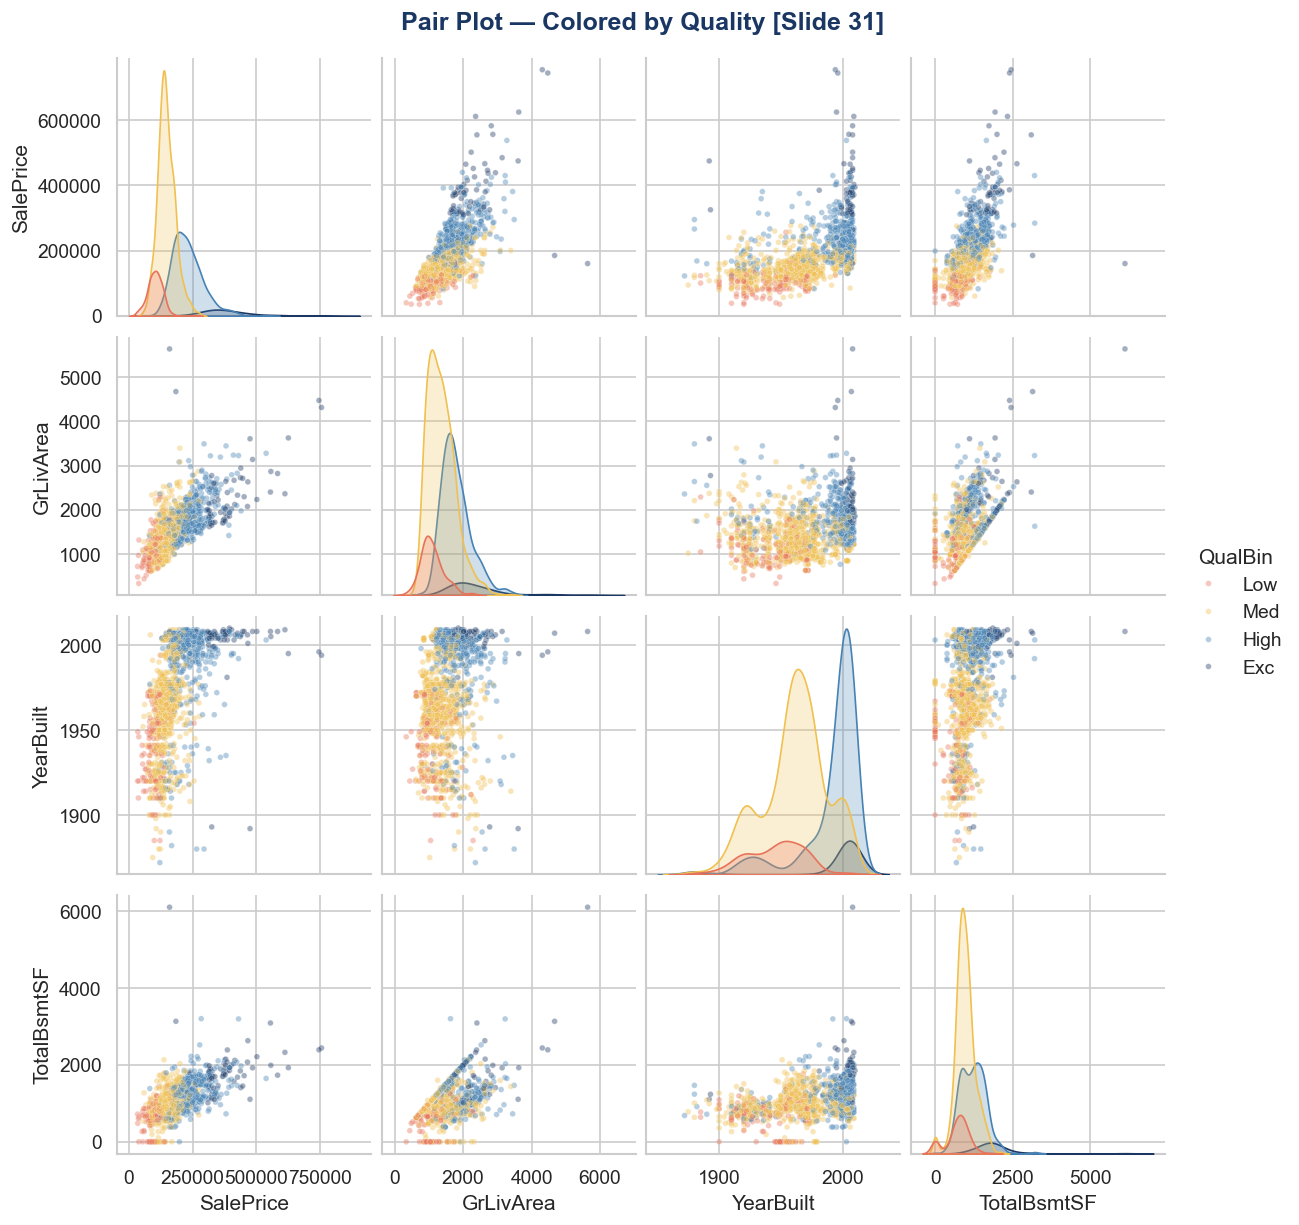

→ Limit to 5-7 features max; panels become unreadable beyond that


In [23]:
# TASK 20 
# Pair plot of SalePrice, GrLivArea, YearBuilt, TotalBsmtSF, colored by quality bins
# Hint: pd.cut() to bin OverallQual into 4 groups, sns.pairplot(hue=...)
#
# YOUR CODE HERE
pair_feats = ['SalePrice', 'GrLivArea', 'YearBuilt', 'TotalBsmtSF']
df['QualBin'] = pd.cut(df['OverallQual'], bins=[0,4,6,8,10], labels=['Low','Med','High','Exc'])

g = sns.pairplot(df[pair_feats + ['QualBin']].dropna(), hue='QualBin',
 palette={'Low': CORAL, 'Med': '#F0C050', 'High': STEEL, 'Exc': NAVY},
 plot_kws={'s': 12, 'alpha': 0.4}, diag_kind='kde', height=2.5)
g.fig.suptitle('Pair Plot — Colored by Quality [Slide 31]', fontweight='bold', color=NAVY, y=1.02)
plt.show()

print('→ Limit to 5-7 features max; panels become unreadable beyond that')




### 6.2 PCA `[Slides 32-33]`

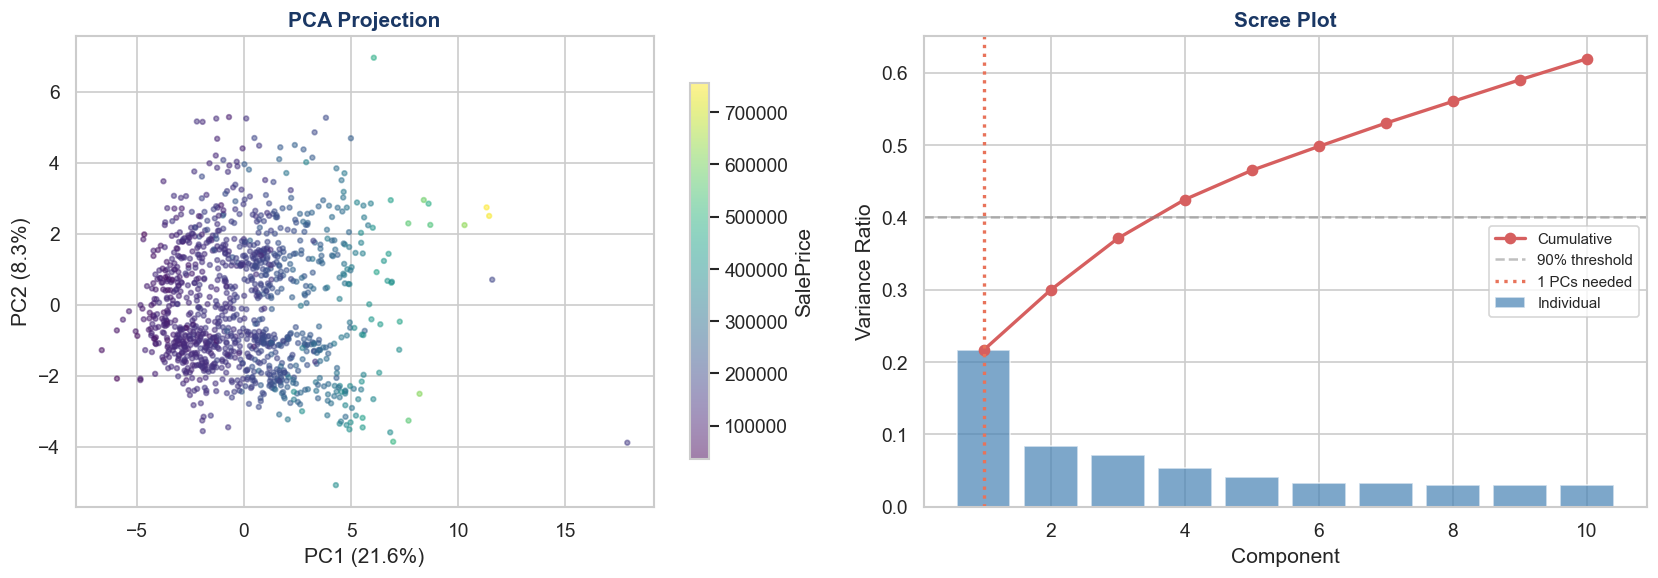

→ 1 components capture 22% of variance from 38 features


In [24]:
# TASK 21 
# PCA: scale data → fit 10 components → plot 2D projection colored by SalePrice + scree plot
# Hint: StandardScaler().fit_transform(), PCA(n_components=10).fit_transform(). Scree: cumsum of explained_variance_ratio_
#
# YOUR CODE HERE
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

X = df[num_cols].dropna()
idx = X.index
X_scaled = StandardScaler().fit_transform(X)

pca = PCA(n_components=10)
X_pca = pca.fit_transform(X_scaled)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Projection
sc = axes[0].scatter(X_pca[:, 0], X_pca[:, 1], c=df.loc[idx, 'SalePrice'],
 cmap='viridis', s=8, alpha=0.5)
plt.colorbar(sc, ax=axes[0], label='SalePrice', shrink=0.8)
axes[0].set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)')
axes[0].set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)')
axes[0].set_title('PCA Projection', fontweight='bold', color=NAVY)

# Scree
cumvar = np.cumsum(pca.explained_variance_ratio_)
axes[1].bar(range(1,11), pca.explained_variance_ratio_, color=STEEL, alpha=0.7, label='Individual')
axes[1].plot(range(1,11), cumvar, 'ro-', lw=2, label='Cumulative')
axes[1].axhline(0.4, color='gray', ls='--', alpha=0.5, label='90% threshold')
n90 = np.argmax(cumvar >= 0.9) + 1
axes[1].axvline(n90, color=CORAL, ls=':', lw=2, label=f'{n90} PCs needed')
axes[1].legend(fontsize=9); axes[1].set_xlabel('Component'); axes[1].set_ylabel('Variance Ratio')
axes[1].set_title('Scree Plot', fontweight='bold', color=NAVY)

plt.tight_layout(); plt.show()
print(f'→ {n90} components capture 22% of variance from {len(num_cols)} features')



---
## Step 7 — Missing Data `[Slides 36-38]` 10 min

> **The pattern of missingness contains information!** — See Rubin's taxonomy `[Slide 36]`

| Type | Mechanism | Strategy |
|------|-----------|----------|
| **MCAR** | Independent of all data | Drop rows |
| **MAR** | Depends on *observed* data | Impute |
| **MNAR** | Depends on *missing value itself* | Domain knowledge |

In [25]:
# TASK 22 
# Count features with missing values. Show top 10 with their % missing.
# Hint: df.isnull().sum() / len(df) * 100. Sort descending.
#
# YOUR CODE HERE


In [26]:
# TASK 23 
# Bar chart of top 12 missing features. Heatmap of missingness patterns. What co-occurrence patterns do you see?
# Hint: df[cols].isnull().astype(int) for the matrix. sns.heatmap() with binary colormap. [Slide 37]
#
# YOUR CODE HERE


In [27]:
# TASK 24 
# Compare Mean, Median, and KNN imputation on LotFrontage. Which preserves the distribution best?
# Hint: KNNImputer(n_neighbors=5) from sklearn.impute. Use nearby features (LotArea, GrLivArea). [Slide 38]
#
# YOUR CODE HERE


---
## Step 8 — Outlier Detection `[Slides 40-42]` 8 min

### 8.1 IQR Method & Z-Score `[Slide 40]`

In [28]:
# TASK 25 
# Write IQR and Z-score outlier functions. Apply to GrLivArea. Scatter plot showing outliers in red.
# Hint: IQR: Q1-1.5*IQR, Q3+1.5*IQR. Z-score: |z| > 3. [Slide 40]
#
# YOUR CODE HERE


### 8.2 Isolation Forest `[Slide 41]`

In [29]:
# TASK 26 
# Isolation Forest on GrLivArea × SalePrice (contamination=0.02). Scatter normal vs outlier.
# Hint: IsolationForest(contamination=0.02). fit_predict() returns 1 (normal) or -1 (outlier). [Slide 41]
#
# YOUR CODE HERE


---
## Step 9 — Data Transformations `[Slides 44-46]` 8 min

### 9.1 Log Transform `[Slide 44]`

In [30]:
# TASK 27 
# Apply log1p transform to SalePrice, LotArea, GrLivArea. Show before/after with skewness values.
# Hint: np.log1p(). .skew() for skewness. Side-by-side histograms. [Slide 44]
#
# YOUR CODE HERE


### 9.2 Feature Scaling `[Slide 45]`

In [31]:
# TASK 28 
# Apply 4 scalers to GrLivArea. Side-by-side histograms. Which preserves shape? Which normalizes?
# Hint: StandardScaler, MinMaxScaler, RobustScaler, PowerTransformer from sklearn.preprocessing. [Slide 45]
#
# YOUR CODE HERE


### 9.3 Encoding `[Slide 46]`

In [32]:
# TASK 29 
# Apply label encoding to ExterQual, one-hot to BldgType, target encoding to Neighborhood.
# Hint: .map(dict) for label. pd.get_dummies() for one-hot. .groupby().mean() for target. [Slide 46]
#
# YOUR CODE HERE


---
## Step 10 — Wrap-up `[Slides 48-53]` 2 min

### Anscombe's Quartet — Why We ALWAYS Visualize `[Slide 48]`

Four datasets with IDENTICAL statistics:
 Dataset I: mean(x)=9.0, mean(y)=7.50, r=0.816
 Dataset II: mean(x)=9.0, mean(y)=7.50, r=0.816
 Dataset III: mean(x)=9.0, mean(y)=7.50, r=0.816
 Dataset IV: mean(x)=9.0, mean(y)=7.50, r=0.817


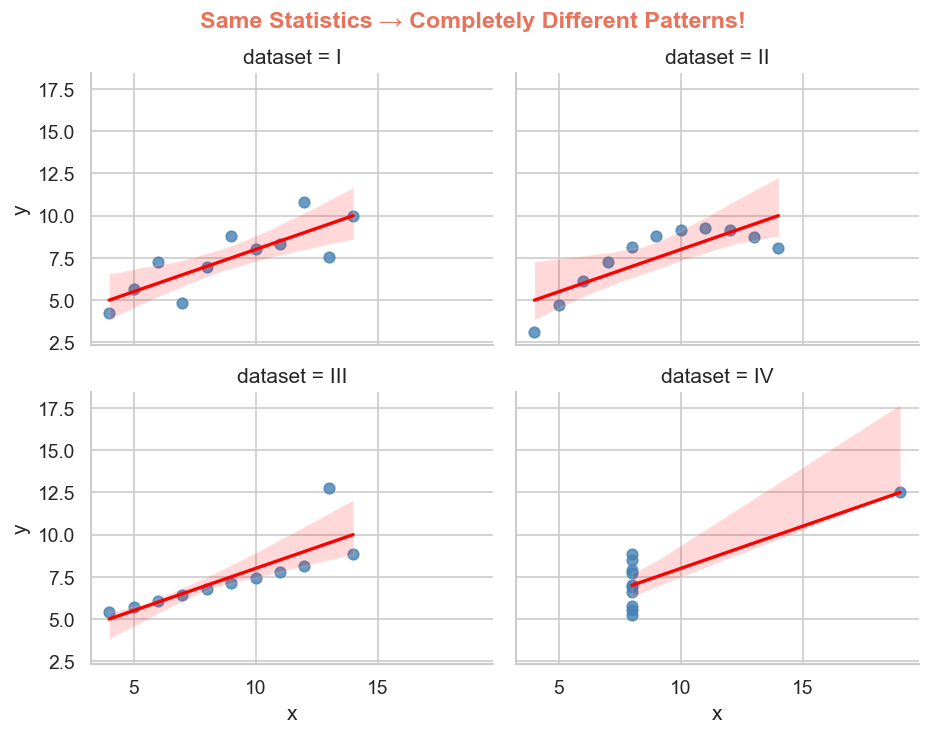


 LESSON: Never skip visualization. Statistics can lie. [Slide 48]


In [33]:
# Anscombe's Quartet 
anscombe = sns.load_dataset('anscombe')

print('Four datasets with IDENTICAL statistics:')
for ds in ['I', 'II', 'III', 'IV']:
 d = anscombe[anscombe['dataset'] == ds]
 print(f' Dataset {ds}: mean(x)={d["x"].mean():.1f}, mean(y)={d["y"].mean():.2f}, '
 f'r={d["x"].corr(d["y"]):.3f}')

g = sns.lmplot(data=anscombe, x='x', y='y', col='dataset', col_wrap=2,
 height=3, aspect=1.3, scatter_kws={'s': 40, 'color': STEEL},
 line_kws={'color': 'red', 'lw': 2})
g.fig.suptitle('Same Statistics → Completely Different Patterns!', fontweight='bold', color=CORAL, fontsize=14, y=1.02)
plt.show()
print('\n LESSON: Never skip visualization. Statistics can lie. [Slide 48]')

### EDA Checklist — Before You Model `[Slide 53]`

Run through this checklist before starting any modeling:

- [ ] Shape, types, and column names understood?
- [ ] Missing value patterns identified and strategy decided?
- [ ] Every feature's distribution examined?
- [ ] Outliers detected and handling strategy chosen?
- [ ] Feature-target correlations verified?
- [ ] Multicollinearity addressed?
- [ ] Transformations applied (log, scaling)?
- [ ] Categorical features encoded?
- [ ] All findings documented?

> **Only when all boxes are checked → proceed to modeling.**

---

### Summary of what we did today

| Step | What | Key Finding (Ames) |
|------|------|--------------------|
| 1 | First contact | 1,460 × 81, no duplicates |
| 2 | Data types | 38 numerical, 43 categorical |
| 3 | Summary stats | SalePrice right-skewed (skew ≈ 1.9) |
| 4 | Univariate | Many features highly skewed; QQ confirms non-normality |
| 5 | Bivariate | OverallQual (r=0.79) and GrLivArea (r=0.71) top predictors |
| 6 | Multivariate | 6 PCs capture 90% variance; quality separates clusters |
| 7 | Missing data | 19 features missing; PoolQC = 99.5% (no pool, not error) |
| 8 | Outliers | 2 extreme GrLivArea points; Isolation Forest detects multivariate |
| 9 | Transforms | Log reduces skew from 1.9 → 0.1; RobustScaler for outliers |

---
*End of Hands-On Lab — LUISS Guido Carli*

---
### Well done
You've completed the full EDA pipeline. Compare your solutions with the complete notebook to check your work.

**Key takeaway:** This workflow (Steps 1→9) works on **any** tabular dataset. Memorize the structure, not the code.